# Diwali Sales Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
# Reading the data 
df= pd.read_csv("Diwali Sales Data.csv", encoding ="unicode_escape")
# to avoid encoading error we used unicode_escape 

In [3]:
# Checking the sjape of dataframe
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Dropping the columns status and unnamed1 because they don't have any data
df.drop(["Status","unnamed1"],axis=1, inplace=True)

In [7]:
# Checking the null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#dropping the null values
df.dropna(inplace=True)

In [9]:
# Changing the datatype of amount 
df["Amount"]=df["Amount"].astype(int)

In [10]:
df["Amount"].dtypes

dtype('int32')

In [11]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

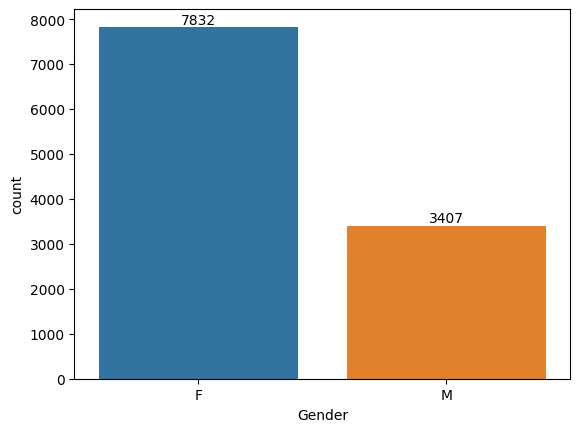

In [12]:
ax = sns.countplot(x="Gender",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

Insight - 

    Here , we can see that the most of the buyers are females even the purchasing power of female greater than men.

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

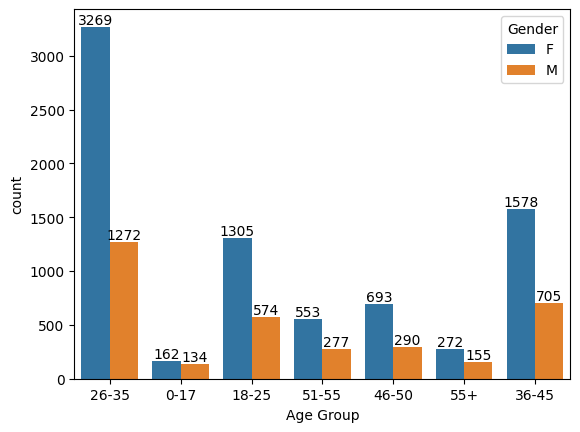

In [14]:
# For age group 
ax =sns.countplot(x="Age Group",data=df, hue="Gender")

for bars in ax.containers:
    ax.bar_label(bars)

In [15]:
# Total Amount vs age group
sales_age =df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

In [16]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


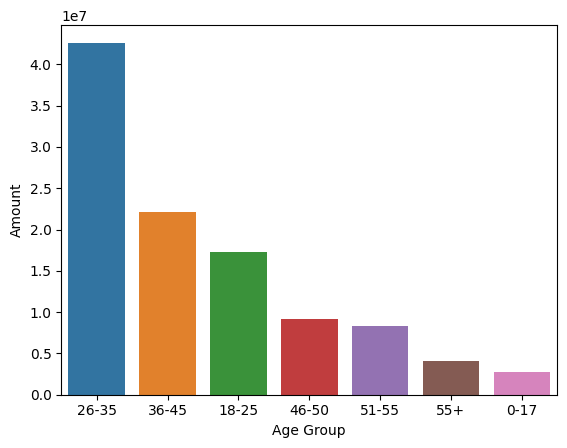

In [17]:
ax= sns.barplot(x="Age Group",y="Amount",data=sales_age)


## Insights 2 -
        From above graphs we conslude that most of the buyers are between the age group of 26 to 35 and mostly are females.

In [18]:
# The total number of orders from top state
sales_state = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by='Orders',ascending=False).head(10)

In [19]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


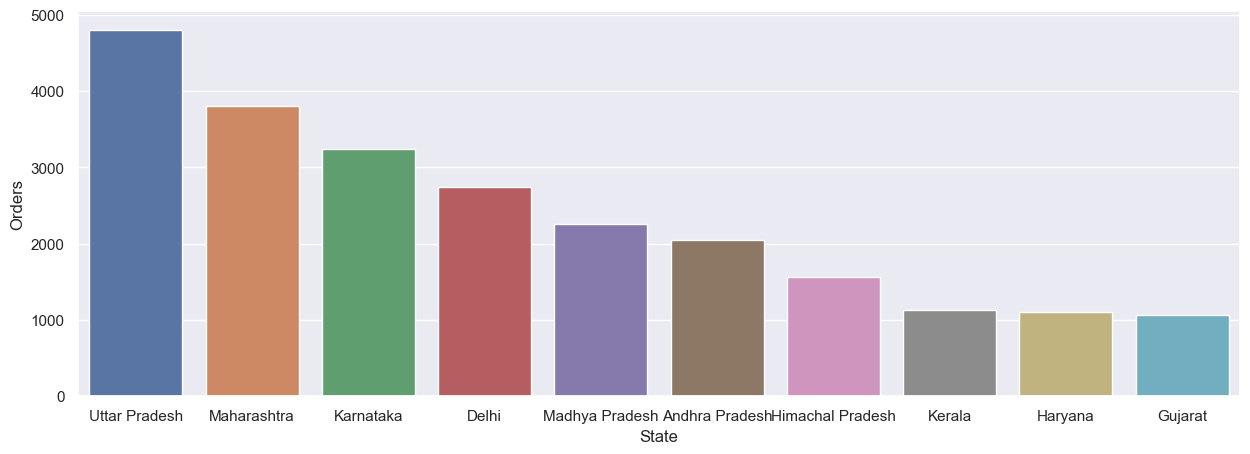

In [20]:
sns.set(rc={"figure.figsize":(15,5)})
ax = sns.barplot(x="State",y="Orders",data=sales_state)

In [27]:
# The total number of Amount spent by states
sales_state_amt = df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)

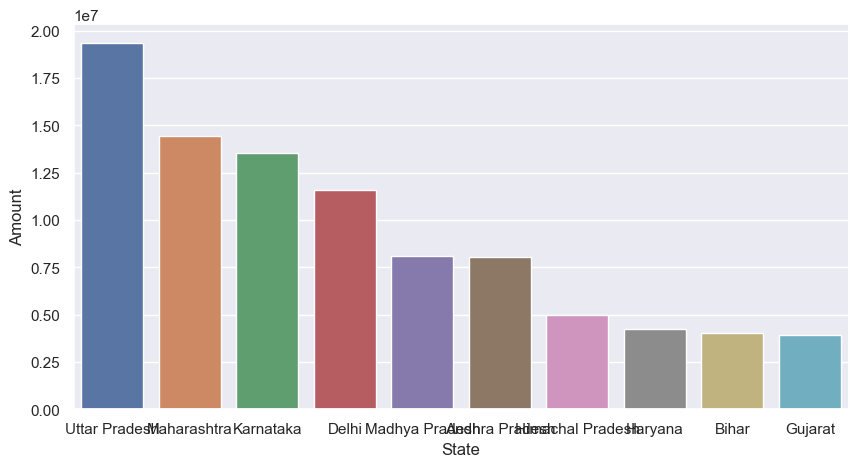

In [28]:
ax =sns.barplot(x="State",y="Amount",data=sales_state_amt)

## Marital Status

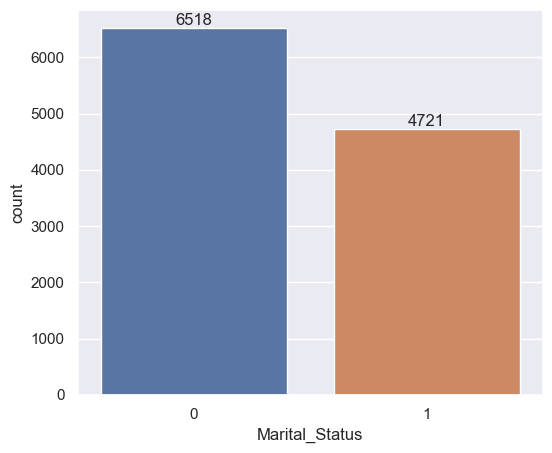

In [39]:
ax = sns.countplot(x="Marital_Status",data=df)

sns.set(rc={"figure.figsize":(10,2)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

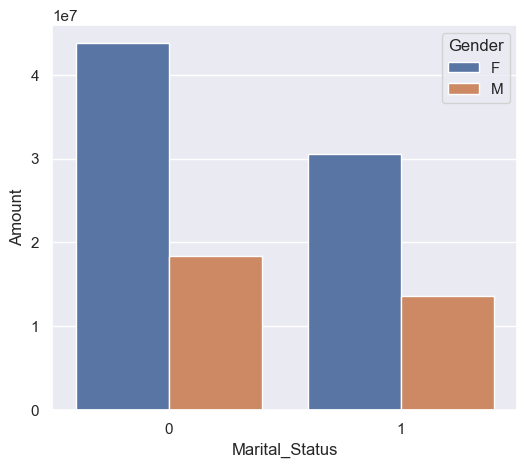

In [34]:
sales_state_amt = df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(data=sales_state_amt,x="Marital_Status",y="Amount",hue="Gender")

Insights 3 -
        From the above graph we can conclude that the most of purchases are done by married(womens) and they have high purchasing power

## Occupation

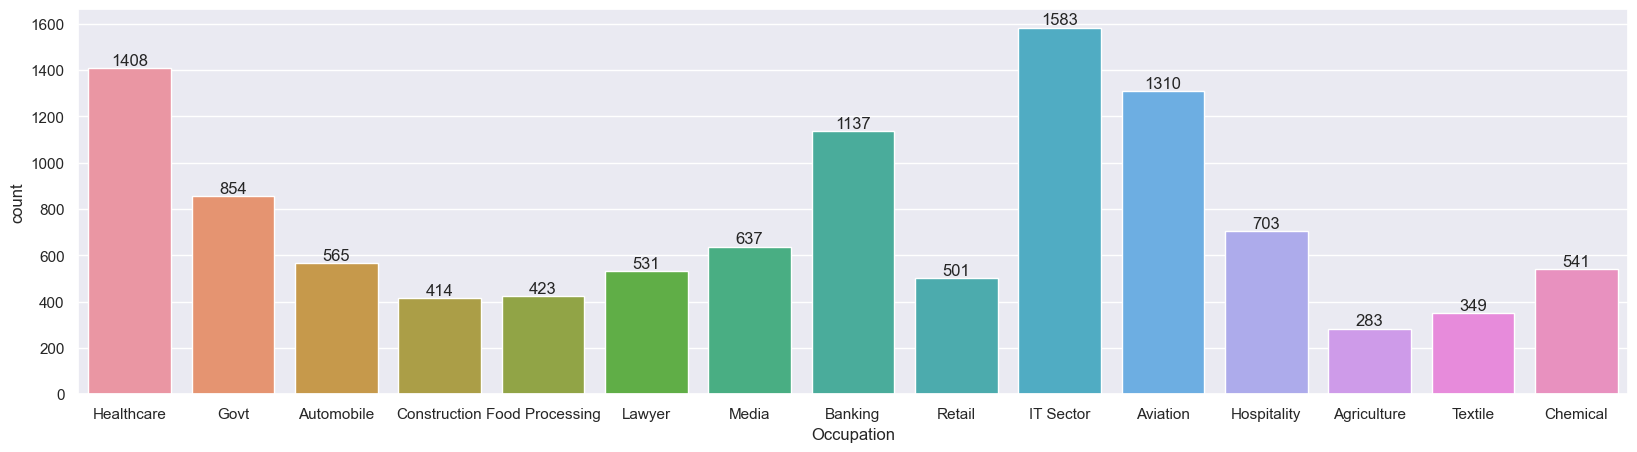

In [37]:
ax =sns.countplot(data=df,x="Occupation")
sns.set(rc={"figure.figsize":(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

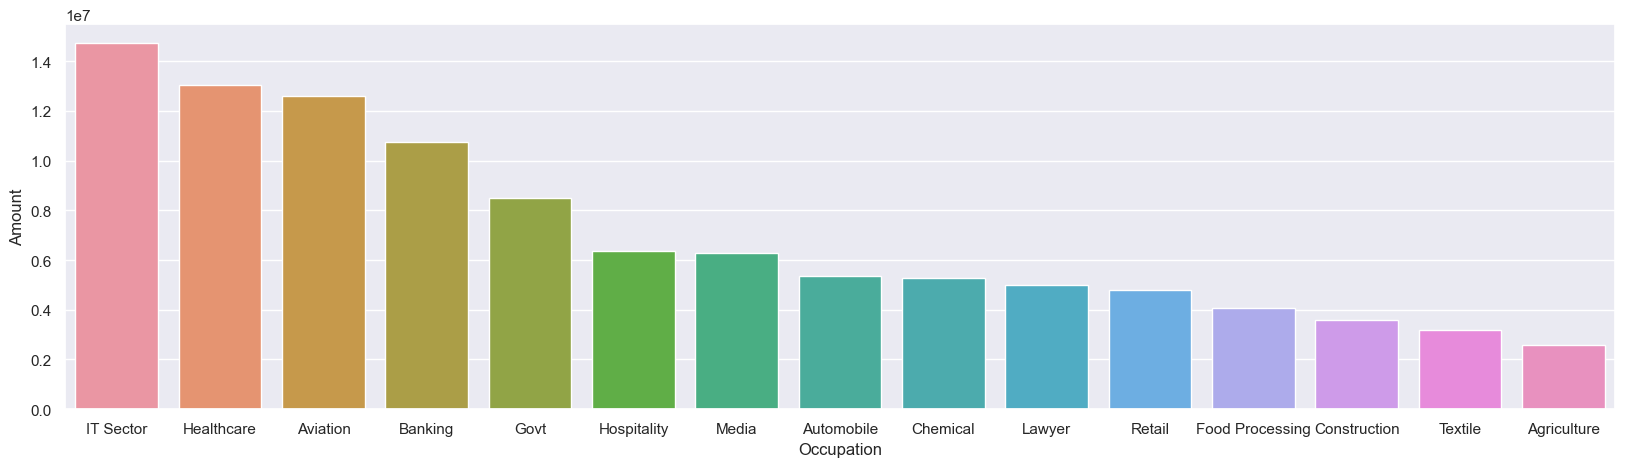

In [42]:
sales_state_occupation = df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales_state_occupation,x="Occupation",y="Amount")

Insight 3-
        From the above graphs we conclude that the most of the purchases are done by 
    the people who's occupation is It , Health Care and Aviation 

## Product Category

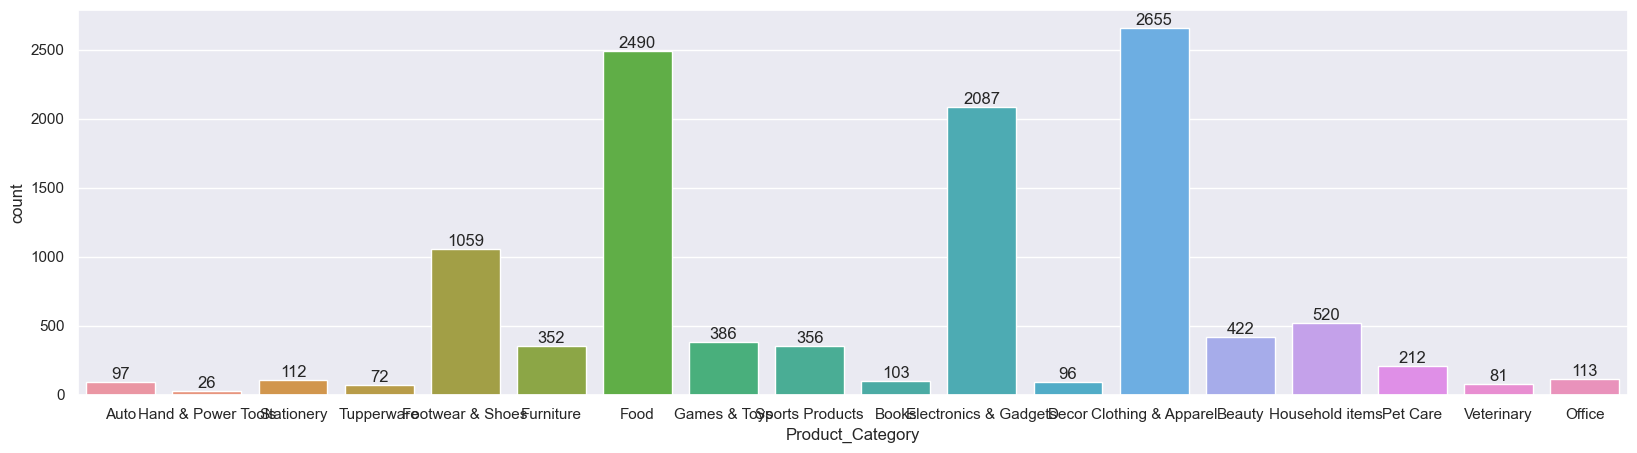

In [49]:

ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

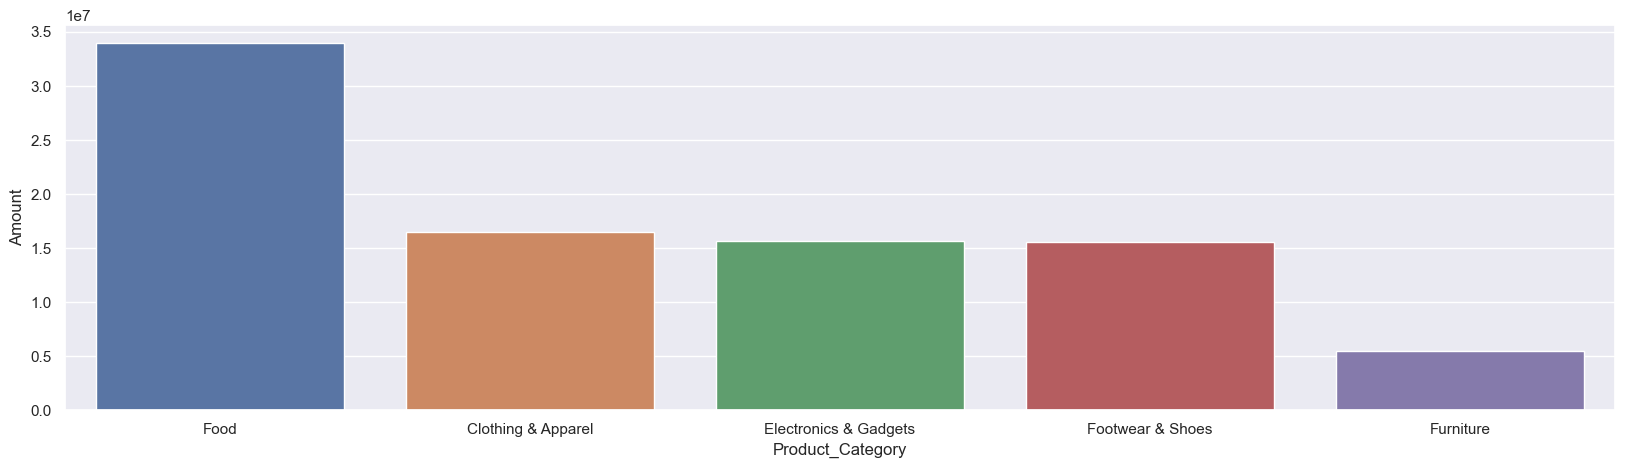

In [55]:
sales_data_product = df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head()

sns.barplot(data=sales_data_product, x="Product_Category",y="Amount")
sns.set(rc={"figure.figsize":(20,5)})


Insights -
         The most sold products are from Food , clothing and apparel and electronics category

# Conclusion 

The married women from age group 26-35 from UP,Maharashtra and Karnataka working in a IT , Aviation , healthcare 
most likely to buy products from food, clothing and electronics category